In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper, cross_val_score # sklearn_pandas intermediary
import pandas as pd 
import numpy as np
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from itertools import groupby
from collections import defaultdict
import matplotlib.patches as mpatches

%matplotlib inline

/Users/bxie/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


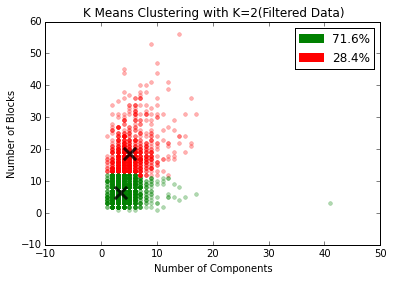

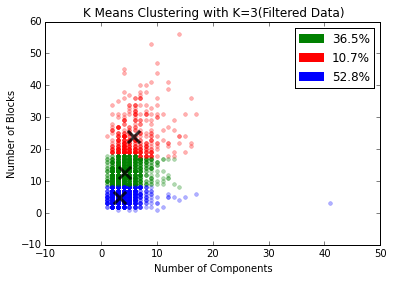

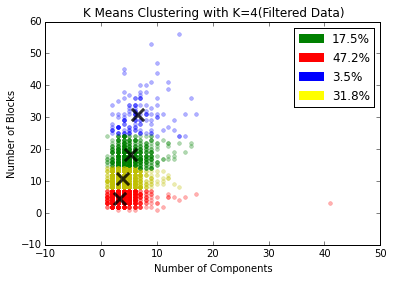

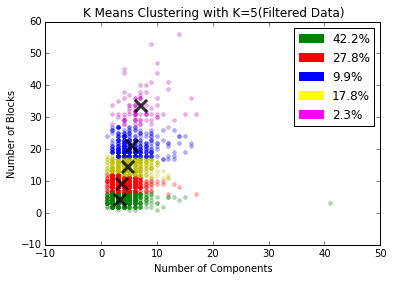

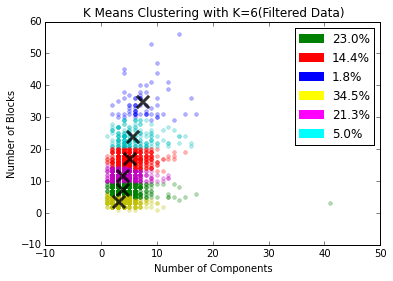

Done!


In [2]:
data = pd.DataFrame.from_csv('omit/ai2_data.csv', 0, 
                             ',',0,True, None, False, False)

#Data Filtering
data = data[data.num_blocks>2][data.num_components>1][data.num_blocks<5000] # "certainly nonfunctional", outliers

cols_data = data[['num_components_unique','num_blocks_unique']]
# print cols_data
X = np.array(cols_data)

# def make_kmeans_plots(data, k_range, output_loc, filtered):
for num_clusters in range(2,7):
    plt.figure() #clears plot
    kmeans = KMeans(n_clusters=num_clusters) #if n>6, need to add to COLORS
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    # print(centroids)
    # print(labels)

    #Plotting
    COLORS = ["g.","r.","b.","y.","m.","c."]
    LEGEND_COLORS = ["green","red","blue","yellow","magenta","cyan"]

    for i in range(len(X)):
    #     print("coordinate:",X[i], "label:", labels[i])
        plt.plot(X[i][0], X[i][1], COLORS[labels[i]], markersize = 8, alpha = 0.3)

    plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 3, zorder = 10, alpha=0.8, color="black")
    plt.xlabel("Number of Components")
    plt.ylabel("Number of Blocks")
    plt.title("K Means Clustering with K=" + str(num_clusters) + "(Filtered Data)")
    
    
    count = defaultdict()
    for val in labels:
        if val in count:
            count[val]+=1
        else:
            count[val]=1
    N = len(labels) #total number of points
    #adding legend
    patch_list = []
    for i in range(0,num_clusters):
        percent = float(count[i]*100./N)
        patch = mpatches.Patch(color=LEGEND_COLORS[i], label=str("%.1f" % percent) + "%")
        patch_list.append(patch)
    plt.legend(handles=patch_list)
     
    
    filename = 'k_'+str(num_clusters)+'.png'
    plt.savefig("k_means_plots/components_to_blocks/filtered/"+filename, dpi=300, figsize=(8,10))
    
    plt.show()
print "Done!"

In [62]:
kmeans = KMeans(n_clusters=3) #if n>6, need to add to COLORS
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
count = defaultdict()

for val in labels:
    if val in count:
        count[val]+=1
    else:
        count[val]=1
    

5225
defaultdict(None, {0: 5090, 1: 119, 2: 16})


In [68]:
count[0]

5158